In [ ]:
import torch
from torch import nn

# check torch version
torch.__version__

In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
# Use RTX5090
torch.cuda.set_device(1)
# Check Cuda Device Being Used
torch.cuda.current_device()
# Check Name of Device
torch.cuda.get_device_name(device)

In [ ]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

image_path = "../Cat_Dog_data"
walk_through_dir(image_path)

In [ ]:
train_dir = "../Cat_Dog_data/train"
test_dir = "../Cat_Dog_data/test"
train_dir, test_dir

# Understanding the Dataset

In [ ]:
import random
from PIL import Image
import glob
from pathlib import Path

# Set seed
random.seed(42)

# 1. Get all image paths
image_path_list = glob.glob(f"{image_path}/*/*/*.jpg")
# print(f"Image Path List: {image_path_list}")

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name
image_class = Path(random_image_path).parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

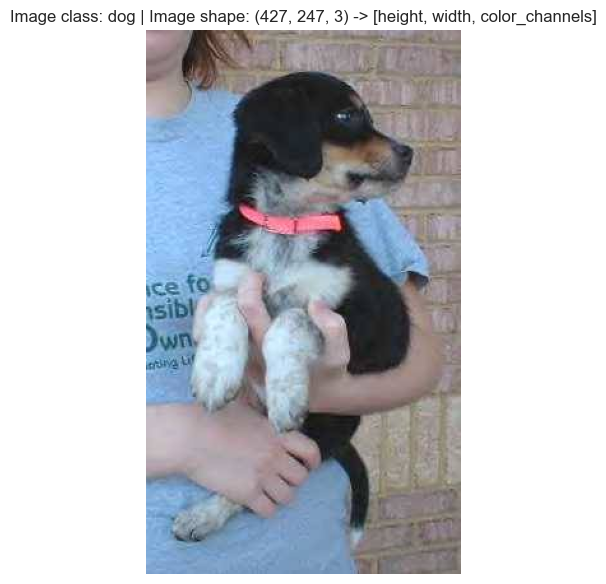

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

sns.set_theme(style="white")

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img_as_array, cmap=None)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)
plt.tight_layout()
plt.show()

# Transforming Data

In [39]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)

# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to IMAGE_SIZE
    transforms.Resize(IMAGE_SIZE),
    # Flips the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

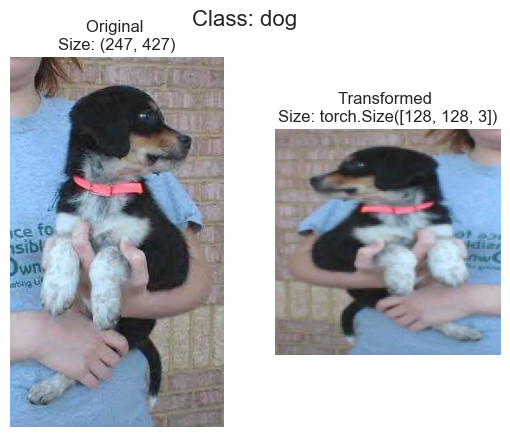

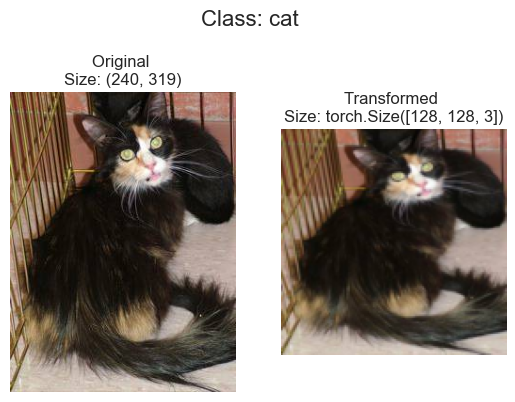

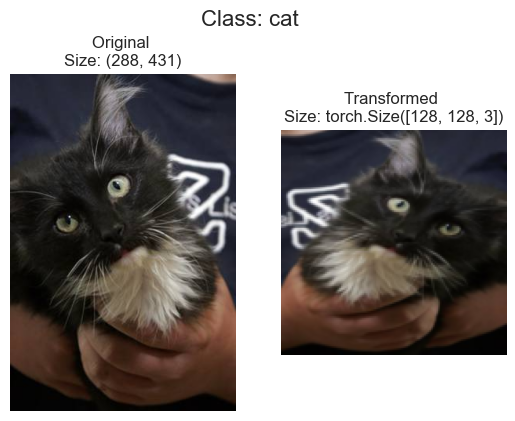

In [41]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)

    random_image_paths = random.sample(image_paths, k=n)

    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")
            fig.suptitle(f"Class: {Path(image_path).parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, transform=data_transform, n=3)

# Loading Image Data

In [42]:
# Creating training set
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)

# Creating testing data set
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform, target_transform=None)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 22500
    Root location: ../Cat_Dog_data/train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 2500
    Root location: ../Cat_Dog_data/test
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [43]:
# Get class names as a list
class_names = train_data.classes
print("Class names: ",class_names)

# Can also get class names as a dict
class_dict = train_data.class_to_idx
print("Class names as a dict: ",class_dict)

# Check the lengths
print("The lengths of the training and test sets: ", len(train_data), len(test_data))

Class names:  ['cat', 'dog']
Class names as a dict:  {'cat': 0, 'dog': 1}
The lengths of the training and test sets:  22500 2500


In [44]:
# Get an image and look at its features
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.9451, 0.9608, 0.9647,  ..., 0.8275, 0.8196, 0.8000],
         [0.9490, 0.9608, 0.9647,  ..., 0.8275, 0.8196, 0.8000],
         [0.9529, 0.9608, 0.9686,  ..., 0.8275, 0.8196, 0.8000],
         ...,
         [0.0078, 0.0118, 0.0118,  ..., 0.6314, 0.6235, 0.6196],
         [0.0118, 0.0118, 0.0118,  ..., 0.6196, 0.6118, 0.6078],
         [0.0078, 0.0078, 0.0078,  ..., 0.6157, 0.6039, 0.5961]],

        [[0.7882, 0.8000, 0.8118,  ..., 0.6745, 0.6667, 0.6471],
         [0.7961, 0.8039, 0.8196,  ..., 0.6745, 0.6667, 0.6471],
         [0.8000, 0.8118, 0.8235,  ..., 0.6745, 0.6667, 0.6471],
         ...,
         [0.0078, 0.0157, 0.0157,  ..., 0.4980, 0.4941, 0.4863],
         [0.0118, 0.0118, 0.0118,  ..., 0.4980, 0.4902, 0.4863],
         [0.0078, 0.0078, 0.0078,  ..., 0.4941, 0.4824, 0.4745]],

        [[0.4784, 0.4745, 0.4902,  ..., 0.3725, 0.3647, 0.3451],
         [0.4824, 0.4824, 0.5020,  ..., 0.3725, 0.3647, 0.3451],
         [0.4902, 0.4941, 0.5098,  ..., 0.37

Original shape: torch.Size([3, 128, 128]) -> [color_channels, height, width]
Image permute shape: torch.Size([128, 128, 3]) -> [height, width, color_channels]


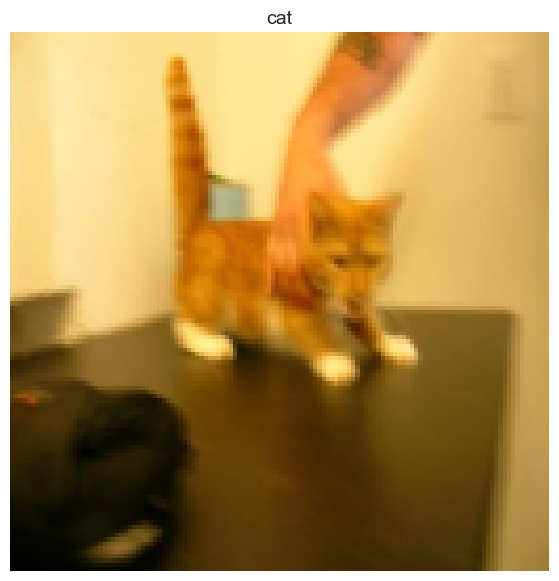

In [45]:
# Visualize Image with matplotlib
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

Turn loaded images into DataLoaders

In [49]:
# How many subprocesses will be used for data loading (higher = more)
NUM_WORKERS = os.cpu_count()
print(f"Number of workers: {NUM_WORKERS}")

train_dataloader = DataLoader(dataset=train_data,
                          batch_size=1, # how many samples per batch
                          num_workers=NUM_WORKERS,
                          shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                         batch_size=1,
                         num_workers=NUM_WORKERS,
                         shuffle=False) # no need to shuffle testing data

train_dataloader, test_dataloader

Number of workers: 8


(<torch.utils.data.dataloader.DataLoader at 0x2793cbad640>,
 <torch.utils.data.dataloader.DataLoader at 0x2793f1df050>)

In [50]:
# Grab a batch image and check the shape
img, label = next(iter(train_dataloader))

# Note that batch size will now be 1.
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 128, 128]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


# Model Building with Data Augmentation

In [51]:
# Set image size.
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

# Create training transform with TrivialAugment
train_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor()])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor()])

Load our dataset with augmentation again

In [52]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform)
test_data_augmented = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_augmented

(Dataset ImageFolder
     Number of datapoints: 22500
     Root location: ../Cat_Dog_data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 2500
     Root location: ../Cat_Dog_data/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

Turn Datasets into DataLoaders

In [54]:
# Set some parameters.
BATCH_SIZE = 32
torch.manual_seed(42)

train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_augmented = DataLoader(test_data_augmented,
                                       batch_size=BATCH_SIZE,
                                       shuffle=False,
                                       num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_augmented

(<torch.utils.data.dataloader.DataLoader at 0x2793cc368a0>,
 <torch.utils.data.dataloader.DataLoader at 0x2793c931850>)

# Create CNN Image Classifier

In [55]:
# # Creating a CNN-based image classifier.
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(
          nn.Conv2d(3, 64, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(64),
          nn.MaxPool2d(2))
        self.conv_layer_2 = nn.Sequential(
          nn.Conv2d(64, 512, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2))
        self.conv_layer_3 = nn.Sequential(
          nn.Conv2d(512, 512, kernel_size=3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2))
        self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=512*3*3, out_features=2))
    def forward(self, x: torch.Tensor):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.classifier(x)
        return x
# Instantiate an object.
model = ImageClassifier().to(device)

Try a forward pass on a single image (test the model)

In [56]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_augmented))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model.eval()
with torch.inference_mode():
    pred = model(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 224, 224])

Output logits:
tensor([[-0.0111, -0.0096]], device='cuda:1')

Output prediction probabilities:
tensor([[0.4996, 0.5004]], device='cuda:1')

Output prediction label:
tensor([1], device='cuda:1')

Actual label:
1


Understanding the Model

In [59]:
from torchinfo import summary

# do a test pass through of an example input size
summary(model, input_size=[1, 3, IMAGE_WIDTH, IMAGE_HEIGHT])

Layer (type:depth-idx)                   Output Shape              Param #
ImageClassifier                          [1, 2]                    --
├─Sequential: 1-1                        [1, 64, 112, 112]         --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─BatchNorm2d: 2-3                  [1, 64, 224, 224]         128
│    └─MaxPool2d: 2-4                    [1, 64, 112, 112]         --
├─Sequential: 1-2                        [1, 512, 56, 56]          --
│    └─Conv2d: 2-5                       [1, 512, 112, 112]        295,424
│    └─ReLU: 2-6                         [1, 512, 112, 112]        --
│    └─BatchNorm2d: 2-7                  [1, 512, 112, 112]        1,024
│    └─MaxPool2d: 2-8                    [1, 512, 56, 56]          --
├─Sequential: 1-3                        [1, 512, 28, 28]          --
│    └─Conv2d: 2-9                       [1, 512, 56, 56]          2,359,

Create Train and Test Loop Functions

In [60]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [61]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

create a function named train to combine the train_step and test_step functions

In [62]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

# Train and Evaluate the Model

In [63]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 25

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_results = train(model=model,
                      train_dataloader=train_dataloader_augmented,
                      test_dataloader=test_dataloader_augmented,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9233 | train_acc: 0.6029 | test_loss: 0.7592 | test_acc: 0.6412
Epoch: 2 | train_loss: 0.6854 | train_acc: 0.6689 | test_loss: 0.5900 | test_acc: 0.7049
Epoch: 3 | train_loss: 0.5764 | train_acc: 0.7305 | test_loss: 0.5104 | test_acc: 0.7429
Epoch: 4 | train_loss: 0.4985 | train_acc: 0.7760 | test_loss: 0.4484 | test_acc: 0.7836
Epoch: 5 | train_loss: 0.3630 | train_acc: 0.8333 | test_loss: 0.2820 | test_acc: 0.8825
Epoch: 6 | train_loss: 0.3000 | train_acc: 0.8659 | test_loss: 0.2792 | test_acc: 0.8841
Epoch: 7 | train_loss: 0.2787 | train_acc: 0.8721 | test_loss: 0.2352 | test_acc: 0.8928
Epoch: 8 | train_loss: 0.2310 | train_acc: 0.8970 | test_loss: 0.1836 | test_acc: 0.9256
Epoch: 9 | train_loss: 0.2133 | train_acc: 0.9074 | test_loss: 0.3022 | test_acc: 0.8884
Epoch: 10 | train_loss: 0.2046 | train_acc: 0.9093 | test_loss: 0.2098 | test_acc: 0.9090
Epoch: 11 | train_loss: 0.1779 | train_acc: 0.9209 | test_loss: 0.1869 | test_acc: 0.9241
Epoch: 12 | train_l

Plot the loss curves of the Model

In [64]:
def plot_loss_curves(results):

    results = dict(list(model_results.items()))

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

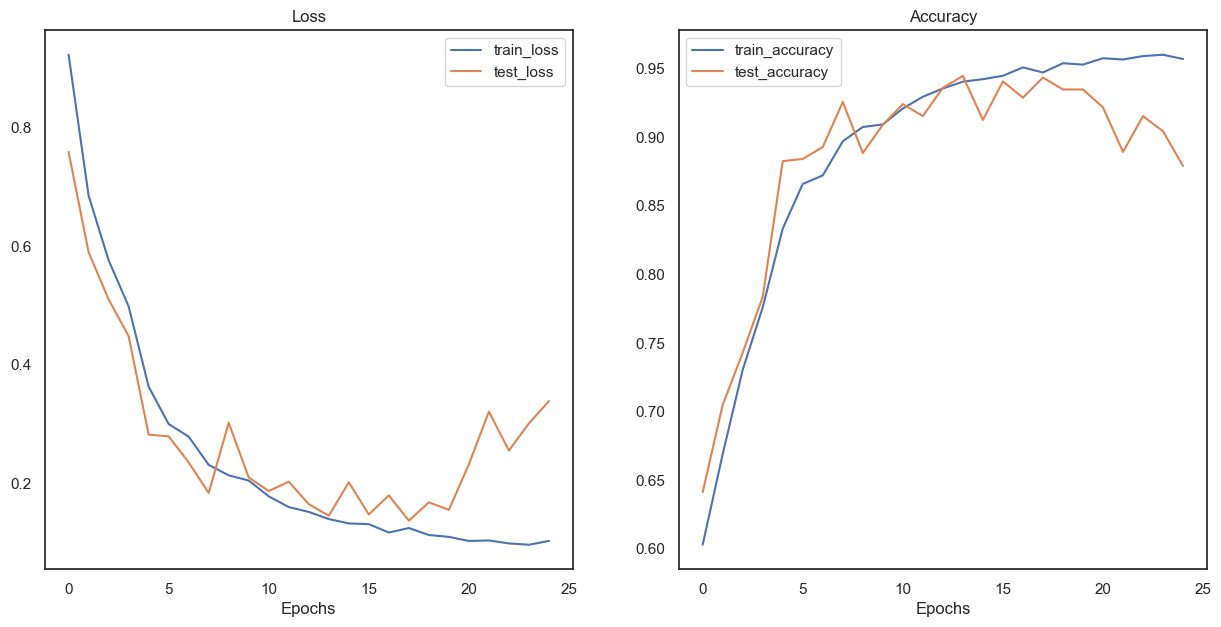

In [65]:
plot_loss_curves(model_results)

# Make a Prediction

In [68]:
# Choose a image.
custom_image_path = "../Cat_Dog_data/test/dog/dog.4002.jpg"

import torchvision
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.0980, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1255],
         [0.0980, 0.0980, 0.0980,  ..., 0.1373, 0.1373, 0.1294],
         [0.1020, 0.1020, 0.0980,  ..., 0.1412, 0.1412, 0.1333],
         ...,
         [0.5059, 0.4902, 0.4471,  ..., 0.1294, 0.1294, 0.1294],
         [0.5804, 0.5137, 0.4549,  ..., 0.1294, 0.1294, 0.1294],
         [0.5451, 0.4588, 0.4275,  ..., 0.1294, 0.1294, 0.1294]],

        [[0.0941, 0.0941, 0.0941,  ..., 0.0980, 0.0980, 0.1059],
         [0.0941, 0.0941, 0.0941,  ..., 0.1059, 0.1059, 0.1098],
         [0.0980, 0.0980, 0.0941,  ..., 0.1098, 0.1098, 0.1137],
         ...,
         [0.3804, 0.3647, 0.3255,  ..., 0.0980, 0.0980, 0.0980],
         [0.4549, 0.3882, 0.3333,  ..., 0.0980, 0.0980, 0.0980],
         [0.4196, 0.3333, 0.3059,  ..., 0.0980, 0.0980, 0.0980]],

        [[0.0863, 0.0863, 0.0863,  ..., 0.0902, 0.0902, 0.0941],
         [0.0863, 0.0863, 0.0863,  ..., 0.0980, 0.0980, 0.0980],
         [0.0902, 0.0902, 0.0863,  ..

In [69]:
custom_image_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 500, 428])
New shape: torch.Size([3, 224, 224])


In [70]:
model.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 224, 224])
Unsqueezed custom image shape: torch.Size([1, 3, 224, 224])


In [71]:
custom_image_pred

tensor([[-8.6731,  8.9703]], device='cuda:1')

In [72]:
# Let's convert them from logits -> prediction probabilities -> prediction labels
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[-8.6731,  8.9703]], device='cuda:1')
Prediction probabilities: tensor([[2.1754e-08, 1.0000e+00]], device='cuda:1')
Prediction label: tensor([1], device='cuda:1')


In [73]:
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'dog'

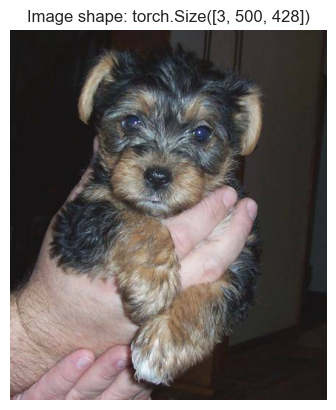

In [74]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);